# Name : Rimzim Shadi

# Level 2 Task 2 - Prediction using Decision Tree Algorithm

# To create a decision tree classifier and visualize it graphically


1. Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
!pip install graphviz
import graphviz

import warnings
warnings.simplefilter("ignore")

In [2]:
iris = pd.read_csv("Iris.csv")  #creating dataframe of the csv file

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
iris = iris.drop("Id",axis=1) #Id package not required

3. Pre-processing the dataset

In [8]:
x = iris.iloc[:, :-1].values
y = iris.iloc[:,4].values

4. Splitting the dataset for testing and training 

In [10]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.30)

5. Applying Decision Tree Classifier

In [11]:
clf = tree.DecisionTreeClassifier(random_state=17)
clf = clf.fit(x_train,y_train)

In [12]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
y_pred = clf.predict(x_test)

6. Accuracy of Algorithm

In [14]:
print('\nAccuracy : {0:.4f}'.format(accuracy_score(y_test,y_pred)))


Accuracy : 0.9111


In [22]:
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

In [23]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species

In [24]:
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [28]:
clf=tree.DecisionTreeClassifier()
clf.fit(train_x_p,train_y_p) 
prediction=clf.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',accuracy_score(prediction,test_y_p))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556


In [29]:
clf.fit(train_x_s,train_y_s) 
prediction=clf.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


7. Visualising Decision Tree Classifier Graphically

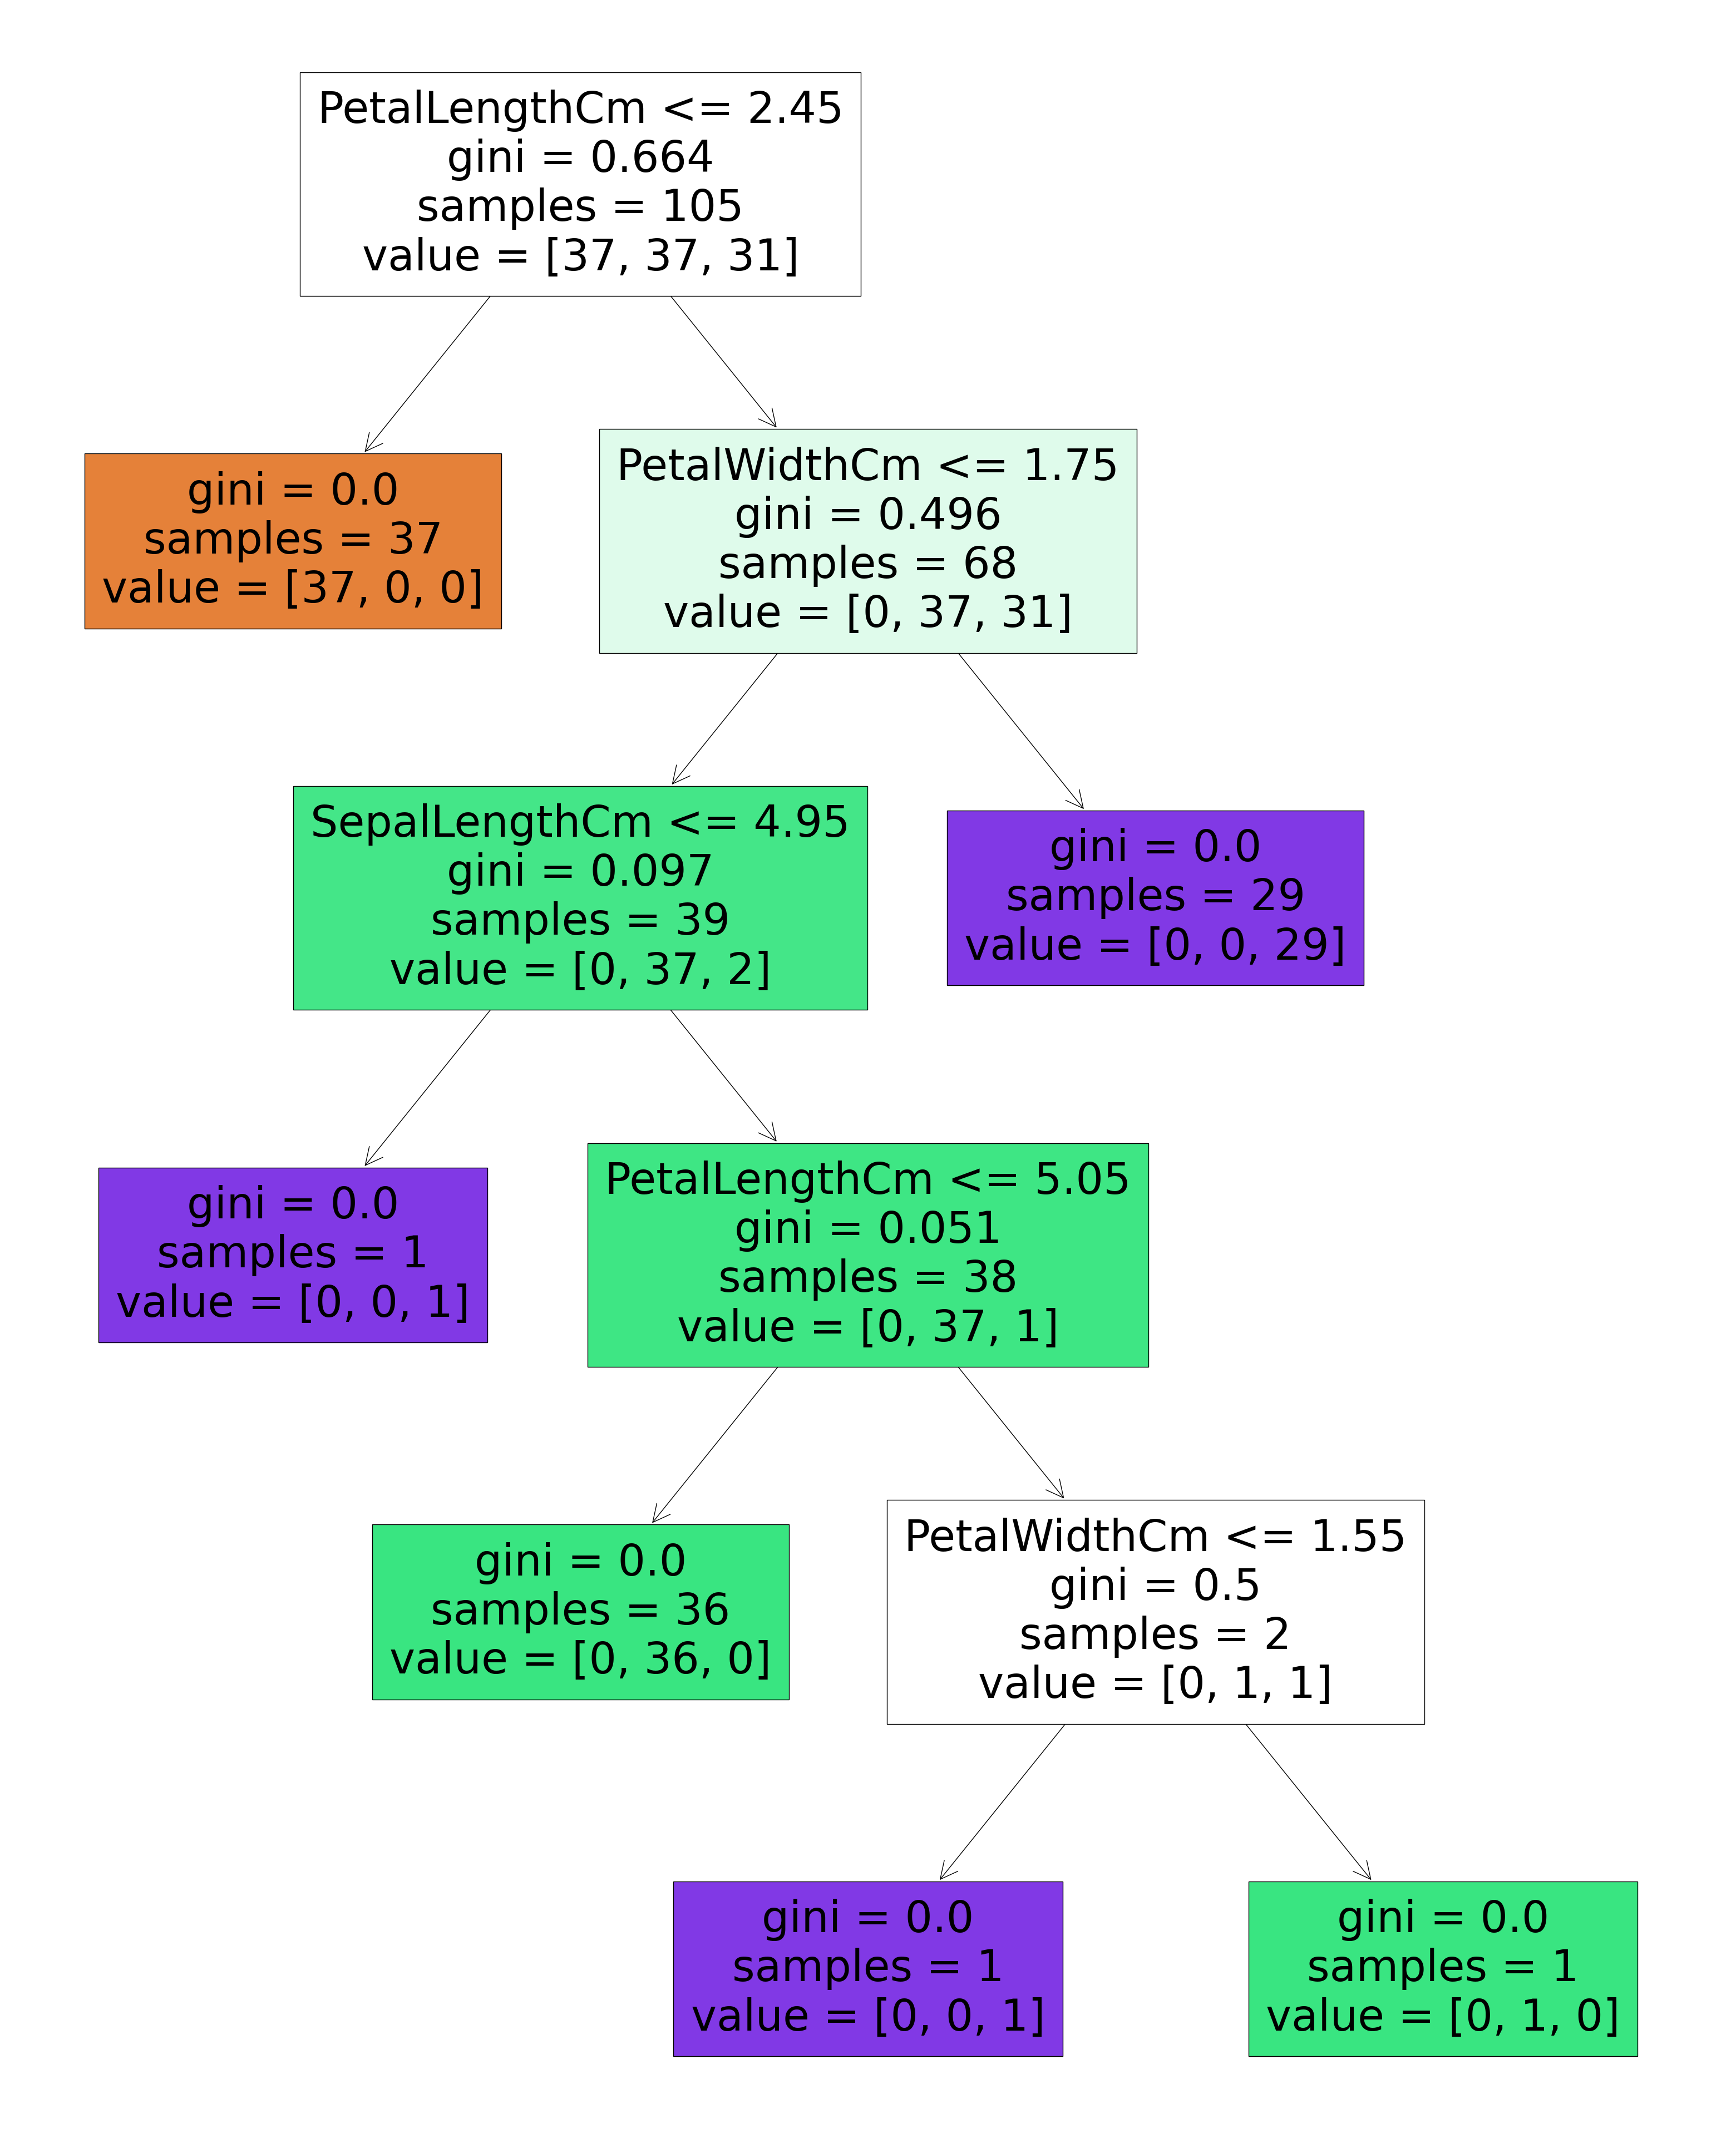

In [21]:
fig = plt.figure(figsize=(40,50))
_ = tree.plot_tree(clf, feature_names=iris.columns, filled=True)